# MK Praktikum Unggulan Universitas Gunadarma
# Nama Mata Kuliah: Praktikum Komputasi Big Data (Tingkat 2)  
---
## Self Study
Sesuai namanya, moda self-study dimana anda akan menjalankan program pada perangkat masing-masing. Materi akan diberikan melalui platform virtual class.

# Pertemuan II
Pada praktikum ini, Anda akan melakukan beberapa operasi dasar statistik dengan data bertema konstruksi yaitu data pembuatan semen (Cement Manufacturing).

* [Histogram](#1)
* [Box Plot ](#3)
* [Summary Statistics](#4)
* [Relationship Between Variables](#5)
* [Correlation](#6)
* [Covariance](#7)
* [Pearson Correlation](#8)
* [Spearman's Rank Correlation](#9)
* [Hypothesis Testing](#10)


<div style="text-align: center;">
  <h1>Materi Praktikum Dikhususkan Untuk Program Studi:</h1>

<div style="text-align: center;">
  <h3>Fakultas Teknologi Industri (FTI)</h3>
<table border="1">
  <thead>
    <tr>
      <th>No</th>
      <th>Program Studi</th>
      <th>Jenjang</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Informatika</td>
      <td>Sarjana</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Teknik Elektro</td>
      <td>Sarjana</td>
    </tr>
  </tbody>
</table>


<div style="text-align: center;">
  <h3>Fakultas Ilmu Komputer dan Teknologi Informasi (FIKTI)</h3>
<table border="1">
  <thead>
    <tr>
      <th>No</th>
      <th>Program Studi</th>
      <th>Jenjang</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Sistem Informasi</td>
      <td>Sarjana</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Sistem Komputer</td>
      <td>Sarjana</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Manajemen Informatika</td>
      <td>Diploma Tiga</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Teknik Komputer</td>
      <td>Diploma Tiga</td>
    </tr>
  </tbody>
</table>


### Overview Dataset
"Data Pembuatan Semen (Cement Manufacturing)"

Beton merupakan material terpenting dalam teknik sipil. Kuat tekan beton adalah fungsi yang sangat nonlinier dari umur dan bahan. Bahan-bahan tersebut antara lain semen, terak tanur tinggi, fly ash, air, superplasticizer, agregat kasar, dan agregat halus. Dataset ini berisi data mengenai kekuatan semen, bahan penyusun dan waktu campuran.

Kekuatan tekan beton (MPa) untuk campuran tertentu di bawah umur tertentu (hari) ditentukan dari informasi laboratorium. Data ini merupakan data (tidak diskalakan). Data memiliki 8 variabel input kuantitatif, dan 1 variabel output kuantitatif, dan 1030 kejadian (pengamatan).

<br>Dataset ini berisikan beberapa kategori sebagai berikut :
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

## Instruksi Praktikum :

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)
2. Bacalah dataset yang berada tersimpan url https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv
3. Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()
4. Buatlah sebuah histogram dari data kolom <code>'strength'</code>.
5. Buatlah diagram boxplot dari dataset yang ada.
6. Hitung karakteristik statistik (standar deviasi, variance, mean, median) dari masing-masing kolom data.
7. Buatlah correlation map dari dataset tersebut.
8. Hitung covariance dari kolom data yang diminta
9. Hitung pearson correlation dan spearsman correlation dari kolom data yang diminta
10. Hitung nilai hipotesis testing untuk kolom <code>'age'</code> dan <code>'strength'</code>.

## JAWABAN ##
<div class="alert alert-info">
    <strong>Catatan!</strong><br>
    Pada bagian #CODE HERE, <...> digantikan dengan code python sesuai dengan perintah.<br>
    </div>

## Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

## Membaca Dataset

In [ ]:
# Membaca data sebagai pandas data frame
url = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv"
data = pd.read_csv(url)

In [ ]:
# Melihat 5 baris awal dari dataset yang digunakan
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
# Melihat dimensi dataset
data.shape

(1030, 9)

In [ ]:
# Melihat kolom dataset
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [ ]:
# mencetak nilai rata rata kekuatan semen pada dataset
print("mean strength :",data['strength'].mean())

mean strength : 35.817961165048544


In [ ]:
# Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()
# CODE HERE
null_data = df.isnull().sum()


<a id="1"></a> <br>
## Histogram

* Menampilkan Berapa kali (frekueni) setiap nilai muncul dalam kumpulan data.
* Jenis deskripsi ini disebut distribusi variabel
* Cara paling umum untuk merepresentasikan distribusi variabel adalah histogram yaitu grafik yang menunjukkan frekuensi dari setiap nilai.
* Frequency = berapa kali setiap nilai muncu
* Contoh: [1,1,1,1,2,2,2]. Frequency dari 1 adalah empat dan frequency dari 2 adalah tiga.

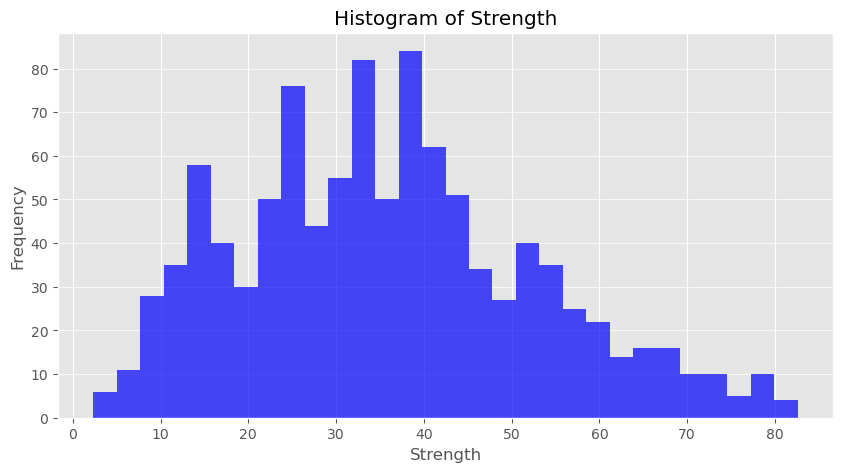

In [ ]:
# Buatlah histogram dari kolom 'strength'
# CODE HERE
plt.figure(figsize=(10, 5))
plt.hist(df['strength'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<a id="3"></a> <br>
## Box Plot
* Anda dapat melihat outlier juga dari box plot
* Temukan outlier pada dataset ini

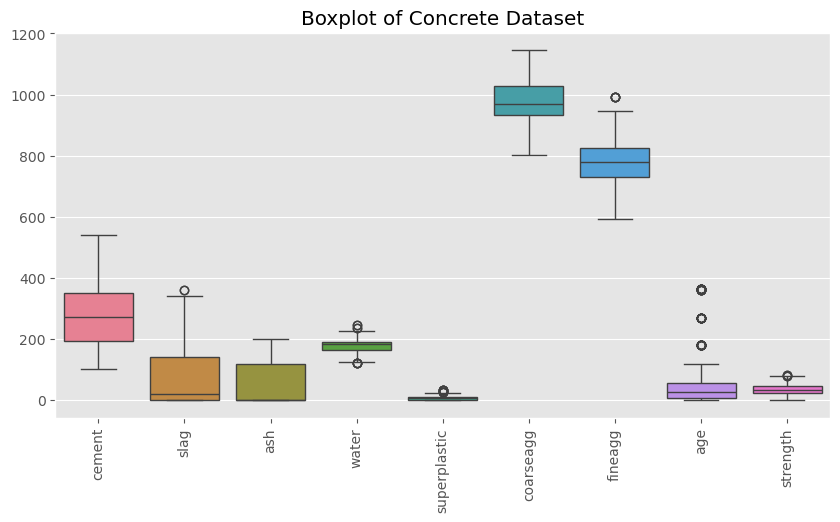

In [ ]:
# Buatlah Box Plot dari kolom 'strength'
# CODE HERE
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Boxplot of Concrete Dataset')
plt.xticks(rotation=90)
plt.show()

<a id="4"></a> <br>
## Summary Statistics
* Mean/rata-rata
* Variance: penyebaran distribusi
* Standart deviation square root dari variance
* Mari kita lihat ringkasan statistik pada data pembuatan semen (Cement Manufacturing):

In [ ]:
# Hitung karakteristik data dari masing-masing kolom dengan menggunakan perintah describe.
# CODE HERE
stats_summary = df.describe()

data_array = np.array(df)

mean = np.mean(data_array, axis=0)
std_dev = np.std(data_array, axis=0)
variance = np.var(data_array, axis=0)
median = np.median(data_array, axis=0)

# Menampilkan hasil
print("\nKarakteristik Statistik:")
print("Mean:", mean)
print("Standar Deviasi:", std_dev)
print("Variance:", variance)
print("Median:", median)



Karakteristik Statistik:
Mean: [281.16786408  73.89582524  54.18834951 181.56728155   6.20466019
 972.91893204 773.58048544  45.66213592  35.81796117]
Standar Deviasi: [104.45562093  86.2374484   63.9659301   21.34384992   5.97094077
  77.71620016  80.13705031  63.13923913  16.69763041]
Variance: [10910.97674398  7436.89750684  4091.64021378   455.5599295
    35.65213362  6039.80776779  6421.94683277  3986.56351777
   278.81086128]
Median: [272.9    22.      0.    185.      6.4   968.    779.5    28.     34.445]


<a id="5"></a> <br>
## Relationship Between Variables
* Kita dapat mengatakan bahwa dua variabel terkait satu sama lain, jika salah satunya memberikan informasi tentang yang lain
* Misalnya, harga dan jarak. Jika Anda pergi jarak jauh dengan taksi Anda akan membayar lebih. Oleh karena itu kita dapat mengatakan bahwa harga dan jarak berhubungan positif satu sama lain.
* Scatter Plot, Cara termudah untuk memeriksa hubungan antara dua variabel
* Mari kita lihat hubungan antara radius mean dan mean area
* Di scatter plot Anda dapat melihat bahwa ketika radius mean meningkat, mean area juga meningkat. Oleh karena itu, mereka berkorelasi positif satu sama lain.
* Tidak ada korelasi antara mean area dan dimensi fraktal se. Karena ketika mean area berubah, dimensi fraktal se tidak terpengaruh oleh peluang mean area

In [ ]:
# Tampilkan hubungan antara data kolom 'age' dan 'strength'
# CODE HERE
covariance = df[['age', 'strength']].cov()
print("\nCovariance antara 'age' dan 'strength':\n", covariance)


Covariance antara 'age' dan 'strength':
                   age    strength
age       3990.437729  347.059758
strength   347.059758  279.081814


In [ ]:
# Tampilkan hubungan antara data kolom 'cement', 'slag','age' dan 'strength'
# CODE HERE

correlation_columns = df[['cement', 'slag', 'age', 'strength']]
pearson_corr = correlation_columns.corr(method='pearson')
spearman_corr = correlation_columns.corr(method='spearman')

print("\nPearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)


Pearson Correlation:
             cement      slag       age  strength
cement    1.000000 -0.275216  0.081946  0.497832
slag     -0.275216  1.000000 -0.044246  0.134829
age       0.081946 -0.044246  1.000000  0.328873
strength  0.497832  0.134829  0.328873  1.000000

Spearman Correlation:
             cement      slag       age  strength
cement    1.000000 -0.245167  0.004640  0.477614
slag     -0.245167  1.000000 -0.017581  0.164105
age       0.004640 -0.017581  1.000000  0.596028
strength  0.477614  0.164105  0.596028  1.000000


<a id="6"></a> <br>
## Correlation
* Kekuatan hubungan antara dua variabel
* Mari kita lihat korelasi antara semua fitur.

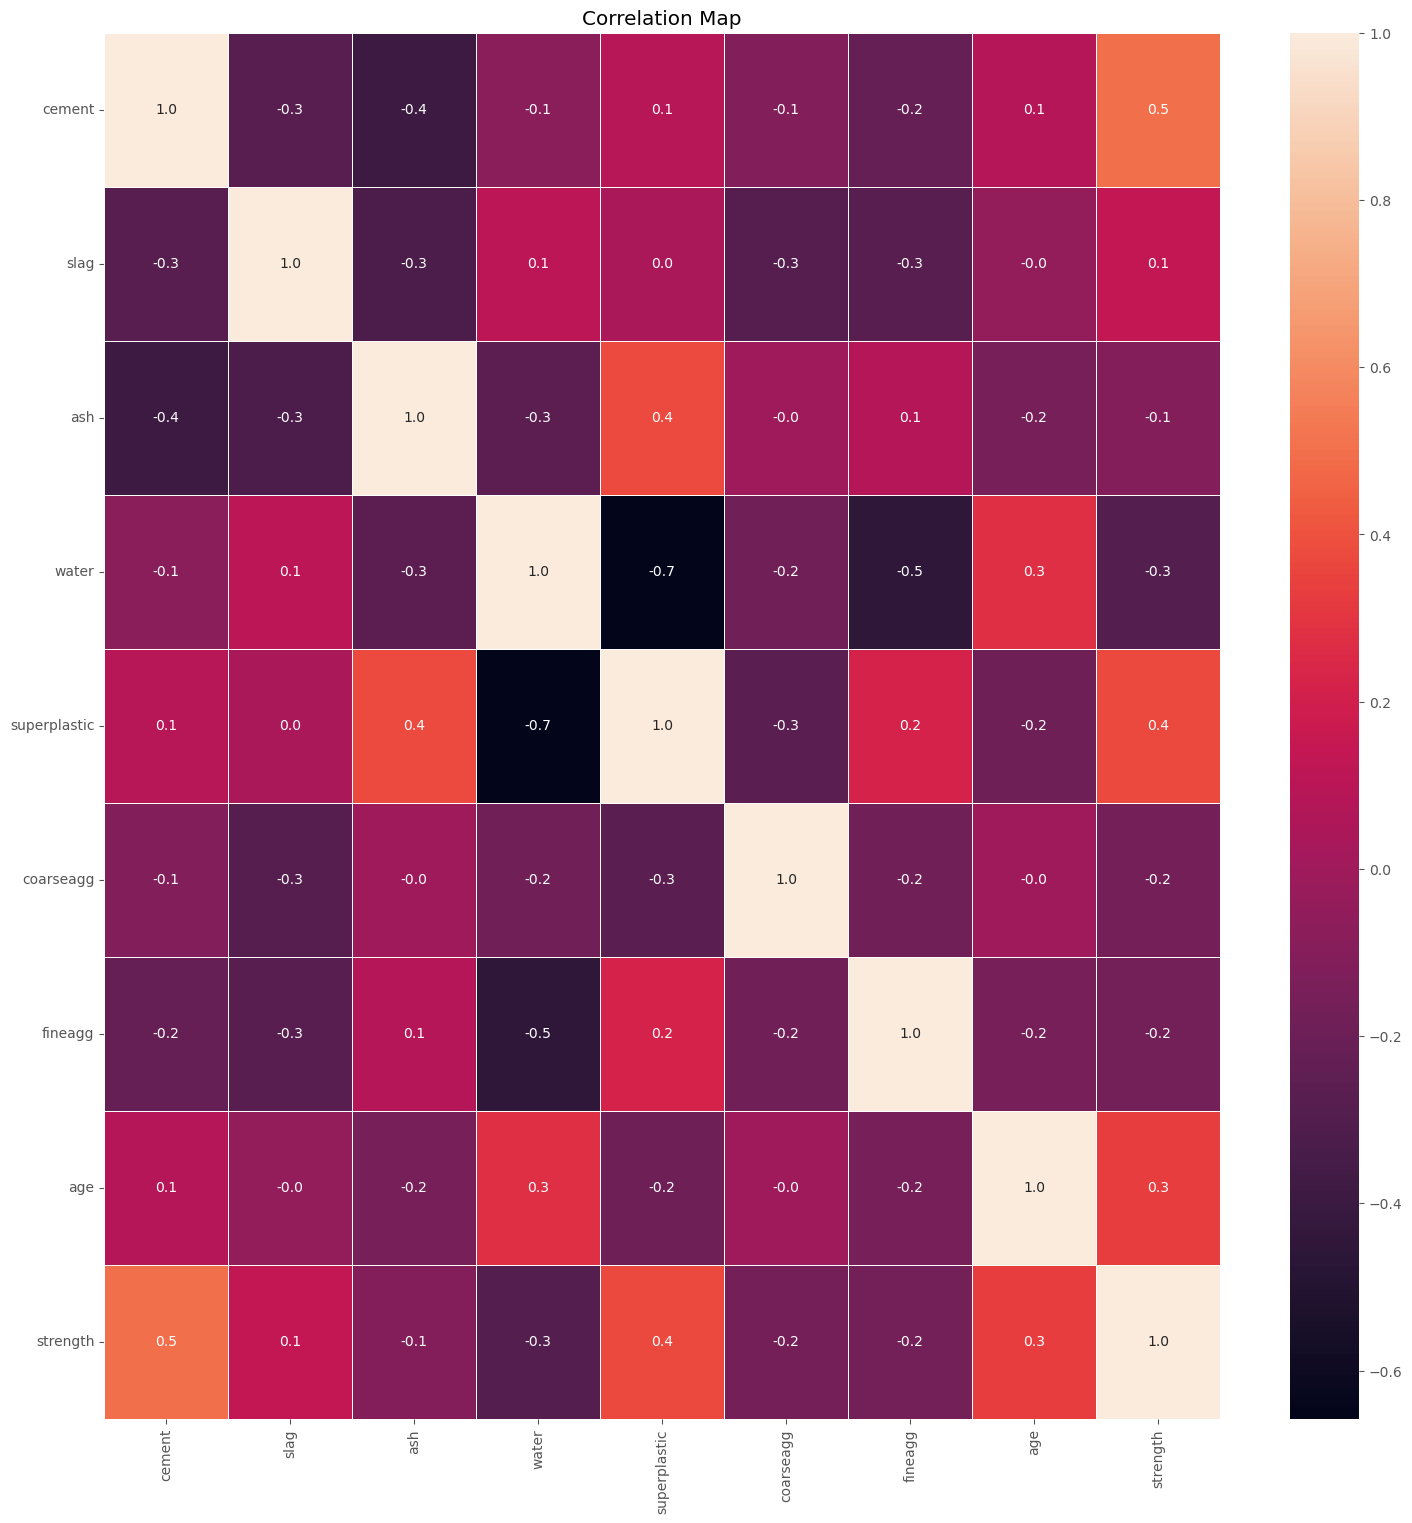

In [ ]:
# Buatlah diagram heatmap dari setiap kolom yang ada dengan library seaborn
# CODE HERE
numeric_data = data.select_dtypes(include=[np.number])

# Membuat heatmap dari kolom numerik
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

* Matriks besar yang mencakup banyak angka
* Kisaran angka ini adalah -1 hingga 1.
* Arti dari 1 adalah dua variabel yang saling berkorelasi positif seperti mean radius dan mean area
* Arti dari nol adalah tidak ada korelasi antara variabel seperti rata-rata radius dan fractal dimension se
* Arti dari -1 adalah dua variabel berkorelasi negatif satu sama lain seperti rata-rata radius dan mean/rata-rata fractal dimension.Sebenarnya korelasi antara keduanya bukan -1, melainkan -0,3 tetapi idenya adalah jika tanda korelasi negatif berarti ada adalah korelasi negatif.

<a id="7"></a> <br>
## Covariance
* Covariance adalah ukuran kecenderungan dua variabel untuk bervariasi bersama-sama
* Jadi covarians dimaksimalkan jika dua vektor identik
* Covarians adalah nol jika mereka ortogonal.
* Covariance negatif jika mereka menunjuk ke arah yang berlawanan
* Mari kita lihat kovarians antara mean radius dan mean area. Kemudian lihat radius mean dan fractal dimension se


In [ ]:
### Bandingkan nilai covariance diantara kolom 'strength' dengan kolom 'age' dan kolom 'cement'
# CODE HERE
# Menghitung covariance antara 'strength' dan 'age'
cov_strength_age = df['strength'].cov(df['age'])

# Menghitung covariance antara 'strength' dan 'cement'
cov_strength_cement = df['strength'].cov(df['cement'])

print(f"\nCovariance antara 'strength' dan 'age': {cov_strength_age:.4f}")
print(f"Covariance antara 'strength' dan 'cement': {cov_strength_cement:.4f}")


Covariance antara 'strength' dan 'age': 347.0598
Covariance antara 'strength' dan 'cement': 869.1430


<a id="8"></a> <br>
## Pearson Correlation
* Pembagian covarians dengan standar deviasi variabel
* Mari kita lihat korelasi pearson antara mean/rata-rata radius dan mean/rata-rata area
* Pertama mari kita gunakan metode .corr() yang sebenarnya kita gunakan pada bagian korelasi. Di bagian korelasi kami sebenarnya menggunakan korelasi pearson :)
* p1 dan p2 adalah sama. Di p1 kita menggunakan metode corr(), di p2 kita menerapkan definisi korelasi pearson (cov(A,B)/(std(A)*std(B)))
* Seperti yang kita harapkan korelasi pearson antara area_mean dan area_mean adalah 1 yang berarti bahwa mereka adalah distribusi yang sama
* Juga pearson correlation antara area_mean dan radius_mean adalah 0,98 yang berarti saling berkorelasi positif dan hubungan antar keduanya sangat tinggi.
* Untuk lebih jelas apa yang kami lakukan di bagian korelasi dan bagian korelasi pearson adalah sama.


In [ ]:
# Hitung nilai pearson correlation dari kolom 'cement' dan 'age'
# CODE HERE
pearson_corr_cement_age = df['cement'].corr(df['age'])

print(f"Nilai Pearson correlation antara 'cement' dan 'age': {pearson_corr_cement_age:.4f}")

Nilai Pearson correlation antara 'cement' dan 'age': 0.0819


<a id="9"></a> <br>
## Spearman's Rank Correlation
* Pearson correlation bekerja dengan baik jika hubungan antara variabel linier dan variabel kira-kira normal. Tapi itu tidak kuat, jika ada outlier
* Untuk menghitung korelasi spearman, kita perlu menghitung peringkat dari setiap nilai


In [ ]:
# Hitung nilai spearsman rank dari kolom data 'age' dan 'strength'
# CODE HERE
spearman_corr_age_strength = df['age'].corr(df['strength'], method='spearman')

print(f"Nilai Spearman rank correlation antara 'age' dan 'strength': {spearman_corr_age_strength:.4f}")

Nilai Spearman rank correlation antara 'age' dan 'strength': 0.5960


* Korelasi Spearman sedikit lebih tinggi dari korelasi pearson
    * Jika hubungan antar distribusi tidak linier, korelasi spearman cenderung lebih baik dalam memperkirakan kekuatan hubungan
    * Korelasi Pearson dapat dipengaruhi oleh outlier, sehingga jika data Anda memiliki outlier, maka teknik Korelasi Spearman's Rank dapat digunakan.

<a id="10"></a> <br>
## Hypothesis Testing
* Classical Hypothesis Testing / Pengujian Hipotesis Klasik
* Apa yang Anda perlu lakukan untuk menjawab pertanyaan berikut : "diberikan sampel dan efek nyata, berapa peluang melihat efek seperti itu secara kebetulan"
* Langkah pertama adalah mengukur ukuran efek nyata dengan memilih statistik uji. Pilihan alami untuk statistik uji adalah perbedaan mean/rata-rata antara dua kelompok.
* Langkah kedua adalah mendefinisikan hipotesis nol yaitu model sistem berdasarkan asumsi bahwa efek yang tampak tidak nyata. Hipotesis nol adalah jenis hipotesis yang digunakan dalam statistik yang menyatakan bahwa tidak ada signifikansi statistik dalam serangkaian pengamatan yang diberikan. Hipotesis nol adalah hipotesis yang orang mencoba untuk menyangkalnya. Hipotesis alternatif adalah hipotesis yang orang ingin mencoba untuk membuktikannya.
* Langkah ketiga adalah menghitung p-value yaitu probabilitas melihat efek nyata jika hipotesis nol benar. Misalkan kita memiliki uji hipotesis nol. Kemudian kita hitung nilai p. Jika nilai p kurang dari atau sama dengan ambang batas, kami menolak hipotesis nol.
* Jika p-value rendah, pengaruh tersebut dikatakan signifikan secara statistik artinya tidak mungkin terjadi secara kebetulan. Oleh karena itu kita dapat mengatakan bahwa efeknya lebih mungkin muncul pada populasi yang lebih besar.
* Mari kita coba contohkan. Hipotesis nol: dunia rata. Hipotesis alternatif: dunia itu bulat. Beberapa ilmuwan mulai menyangkal hipotesis nol. Ini akhirnya mengarah pada refleksi hipotesis nol dan penerimaan hipotesis alternatif.
* Contoh lainnya. "efek ini nyata" ini adalah hipotesis nol. Berdasarkan asumsi itu kami menghitung probabilitas efek yang tampak. Itu adalah nilai-p. Jika nilai p rendah, kami menyimpulkan bahwa hipotesis nol tidak mungkin benar.
* Sekarang mari kita buat contoh kita:
    * Saya ingin mengetahui apakah rata-rata radius dan rata-rata area terkait satu sama lain? Hipotesis nol saya adalah bahwa "hubungan antara rata-rata radius dan rata-rata area adalah nol pada populasi tumor'.
    * Sekarang kita perlu menyangkal hipotesis nol ini untuk menunjukkan bahwa mean/rata-rata radius dan mean/rata-rata area berhubungan. (walaupun sebenarnya kita telah mengetahui hasilnya berdasarkan analisa korelasi yang telah dilakukan sebelumnya)
    * mari kita cari nilai p (nilai probabilitas)

In [ ]:
# Lakukan hubungan hipotesis data antara kolom 'age' dan 'strength'
# CODE HERE
# Menghitung median dari kolom 'age'
mean_radius = df['cement'].mean()  # Ganti dengan kolom radius
mean_area = df['age'].mean()  # Ganti dengan kolom area

# Uji Pearson correlation
pearson_corr, p_value = stats.pearsonr(df['cement'], df['age'])  # Ganti dengan kolom yang sesuai

# Menampilkan hasil
print(f"Rata-rata radius: {mean_radius:.4f}")
print(f"Rata-rata area: {mean_area:.4f}")
print(f"Nilai Pearson correlation: {pearson_corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Menentukan tingkat signifikansi
alpha = 0.05
if p_value < alpha:
    print("Menolak hipotesis nol: Ada hubungan antara rata-rata radius dan rata-rata area.")
else:
    print("Gagal menolak hipotesis nol: Tidak ada hubungan antara rata-rata radius dan rata-rata area.")

Rata-rata radius: 281.1679
Rata-rata area: 45.6621
Nilai Pearson correlation: 0.0819
P-value: 0.0085
Menolak hipotesis nol: Ada hubungan antara rata-rata radius dan rata-rata area.


* Hasil perhitungan P values/ Nilai P hampir mendekati nol, sehingga kita dapat menolak hipotesis nol. Penolakan hipotesis ini memiliki arti nilai rata-rata age dan rata-rata strength pada data ini saling berpengaruh.

<div class="alert alert-warning">
<strong>Perhatian!</strong> Konversi file IPYNB menjadi PDF untuk melakukan pengumpulan tugas di V-Class. <a href="https://youtu.be/qXELXtnAK7c">Video konversi</a>
    </div>



---


Copyright © 2024 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/